#### Figure 4 (*in vivo* part)

##### Package imports, figure settings, color definitions
<img src="color_pal.png" width="500">

/Users/mlanghinrichs/Documents/Studium/MSc/09_hiwi_hoefer/01_project/memo_py/memo_py/selection.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


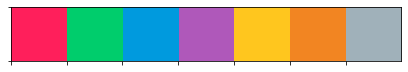

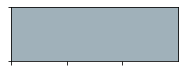

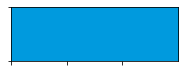

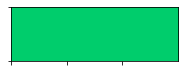

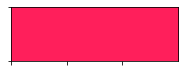

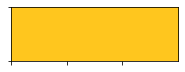

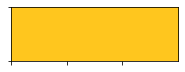

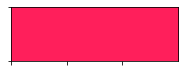

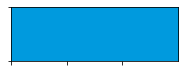

In [1]:
%matplotlib inline
%run settings_load.py

##### Analysis here adapted from old paper_figures notebook

##### in vivo data comparison scatter (day 8 p.i. with single naive CD8+ (CD44low), total cells, Figure S10, Buchholz et al., Science 2013)

In [27]:
data_in_vivo = [573.0512,
303.4965,
1270.892,
226508.2,
1991.696,
16587.44,
498.2143,
485.6683,
1441.871,
189.6853,
48255.95,
3675,
184.0959,
1288.671,
2222.222,
212.4183,
487.5,
3303.873,
14557.73,
778.125,
1900.875,
61512.33,
314.8688,
4823.741,
10902.06,
8611.056,
5855.064,
52490.97,
117135.7,
1828.358,
424.5364,
29234.51,
12114.57,
261.194,
2996.985,
16452.91,
464.3216,
51611.94,
8102.419,
11298.52,
4291.611,
9785.308,
8903.436,
4435.691,
19788,
236.3744,
11129.65,
27186.5,
352.6237,
2548.492,
16749.41,
8878.924,
430.1818,
1367.185,
20984.03,
85954.1,
29554.15,
6306.87,
4516.909,
2124.903,
3308.3,
244.1704,
434.6604,
3110.545,
3919.084,
446.7273,
37029.31,
1447.174,
1901.639,
8454.546,
3341.177,
1397.692,
108179.7,
3396.188,
5732.296,
6652.334]

len(data_in_vivo)

76

##### [over all models] cv over time until day 8 post-infection, in vitro model vs. in vivo data

In [3]:
print(np.mean(data_in_vivo))
print(np.median(data_in_vivo))
print(stats.variation(data_in_vivo))
print(np.sqrt(np.var(data_in_vivo))/np.mean(data_in_vivo))
print(stats.variation(data_in_vivo))
print(np.sqrt(np.var(data_in_vivo, ddof=1))/np.mean(data_in_vivo))

15495.69237631579
3535.594
2.151349094560607
2.151349094560607
2.151349094560607
2.1656439301869628


In [4]:
def bootstrapping_cv(sample, num_resamples):
    """docstring for ."""
    ### sample should be a one-dimensional, flat array

    ### calculate the statistic of the sample
    stat_sample = stats.variation(sample)

    ### bootstrap the standard error of the sample statistic (se_stat_sample)
    # draw random number from sample with replacement
    resamples = np.random.choice(sample, size=(num_resamples, *sample.shape), replace=True)

    # calculate the statistic for each resample
    stat_resamples = stats.variation(resamples, axis=1)

    # compute the standard error as standard deviation over all statistic resamples
    se_stat_sample = np.std(stat_resamples, ddof=1)

    return (stat_sample, se_stat_sample)

In [5]:
# in vivo total cells with bootstrapping
bootstrap_samples = 100000
data_in_vivo_cv_bootstrap = bootstrapping_cv(np.array(data_in_vivo), bootstrap_samples)
print(data_in_vivo_cv_bootstrap)

(2.151349094560607, 0.3012829693578154)


In [6]:
with open(r'waiting_times_files/count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb') as input_file:
    data = pickle.load(input_file)

In [7]:
# total cells with bootstrapping
data_in_vitro_cv_bootstrap = np.full(data.data_covariance.shape, np.nan)
bootstrap_samples = 100000

for time_value_ind in range(data.data_num_time_values):
    data_in_vitro_cv_bootstrap[:, 0, time_value_ind] = bootstrapping_cv(np.sum(data.data_counts[:, :, time_value_ind], axis=1), 
                                                                 bootstrap_samples)

In [8]:
data_in_vitro_cv_bootstrap

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14572086,
         0.14572086, 0.28510602, 0.28510602, 0.41855991, 0.41855991,
         0.43723031, 0.45527215, 0.44472214, 0.48917271, 0.50709255,
         0.5534538 , 0.56532564, 0.59674251, 0.61200119, 0.6223098 ,
         0.64589025, 0.60736224, 0.62739069]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.08799678,
         0.08796495, 0.16853616, 0.16818227, 0.24230882, 0.24176778,
         0.1687254 , 0.09400661, 0.07005936, 0.05148758, 0.05061899,
         0.04505233, 0.036532  , 0.04552223, 0.04939857, 0.05494546,
         0.05987699, 0.05849241, 0.06222418]]])

In [9]:
# NEW: introduce a basic sigma (same as mean and var data = 0.022)
# (not sure if this applies here too, buts just for plotting not fitting)
data_in_vitro_cv_bootstrap[1,:,:][data_in_vitro_cv_bootstrap[1,:,:]==0.0] = 0.022
data_in_vitro_cv_bootstrap

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14572086,
         0.14572086, 0.28510602, 0.28510602, 0.41855991, 0.41855991,
         0.43723031, 0.45527215, 0.44472214, 0.48917271, 0.50709255,
         0.5534538 , 0.56532564, 0.59674251, 0.61200119, 0.6223098 ,
         0.64589025, 0.60736224, 0.62739069]],

       [[0.022     , 0.022     , 0.022     , 0.022     , 0.022     ,
         0.022     , 0.022     , 0.022     , 0.022     , 0.08799678,
         0.08796495, 0.16853616, 0.16818227, 0.24230882, 0.24176778,
         0.1687254 , 0.09400661, 0.07005936, 0.05148758, 0.05061899,
         0.04505233, 0.036532  , 0.04552223, 0.04939857, 0.05494546,
         0.05987699, 0.05849241, 0.06222418]]])

In [10]:
# NEW: try to do the cv prediction as inference over all models
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data
print(sum(['alphaF' in name for name in net_names]))

100 288 588 976
0


In [11]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [12]:
def moment_simulation_inference_cv_total(x, res, samples, mprior):
    model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)

    # set general x values
    y = np.zeros((x.shape[0], samples))

    # for checking set a counter
    model_type_counts = np.zeros((4,))

    for i in range(samples):
        print(i)
        # get random model according to p(M|D)
        model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
        est = res[model_rand]

        # decide whether phase type or markov/erlang model
        # par 3 model
        if 'par3_' in est.net.net_name:
            model_type_counts[3] += 1
            # get random theta according to p(theta|M, D)
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]

            ### compute moment simulation
            # read out initial moments (hidden layer)
            initial_values = est.net_simulation.sim_moments.moment_initial_values
            
            # trigger moment system creation if not done before
            if est.net_simulation.sim_moments.moment_system=='reset':
                est.net_simulation.sim_moments.set_moment_eqs_from_template_after_reset()
            
            # simulate (mean, var, cov), x = time_values
            sim_res = est.net_simulation.sim_moments.run_moment_ode_system(initial_values, x, theta)
            
            # compute moments for total cells
            mean_t = sim_res[0][0, :] + sim_res[0][1, :] # E(T)=E(A)+E(M)
            var_t = sim_res[1][0, :] + sim_res[1][1, :] + 2*sim_res[2][0, :] # Var(T)=Var(A)+Var(M)+2*Cov(A,M)
            
            # compute cv
            cv_t = np.sqrt(var_t)/mean_t
            ###

        # par 2 model
        elif 'par2_' in est.net.net_name:
            model_type_counts[2] += 1
            # get random theta according to p(theta|M, D)
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]

            ### compute moment simulation
            # read out initial moments (hidden layer)
            initial_values = est.net_simulation.sim_moments.moment_initial_values
            
            # trigger moment system creation if not done before
            if est.net_simulation.sim_moments.moment_system=='reset':
                est.net_simulation.sim_moments.set_moment_eqs_from_template_after_reset()
            
            # simulate (mean, var, cov), x = time_values
            sim_res = est.net_simulation.sim_moments.run_moment_ode_system(initial_values, x, theta)
            
            # compute moments for total cells
            mean_t = sim_res[0][0, :] + sim_res[0][1, :] # E(T)=E(A)+E(M)
            var_t = sim_res[1][0, :] + sim_res[1][1, :] + 2*sim_res[2][0, :] # Var(T)=Var(A)+Var(M)+2*Cov(A,M)
            
            # compute cv
            cv_t = np.sqrt(var_t)/mean_t
            ###

        # par1+i model (identified by d_ni symbolic rate)
        elif 'd_ni' in est.net.net_rates_identifier.values():
            model_type_counts[1] += 1
            # get random theta according to p(theta|M, D)
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]

            ### compute moment simulation
            # read out initial moments (hidden layer)
            initial_values = est.net_simulation.sim_moments.moment_initial_values
            
            # trigger moment system creation if not done before
            if est.net_simulation.sim_moments.moment_system=='reset':
                est.net_simulation.sim_moments.set_moment_eqs_from_template_after_reset()
            
            # simulate (mean, var, cov), x = time_values
            sim_res = est.net_simulation.sim_moments.run_moment_ode_system(initial_values, x, theta)
            
            # compute moments for total cells
            mean_t = sim_res[0][0, :] + sim_res[0][1, :] # E(T)=E(A)+E(M)
            var_t = sim_res[1][0, :] + sim_res[1][1, :] + 2*sim_res[2][0, :] # Var(T)=Var(A)+Var(M)+2*Cov(A,M)
            
            # compute cv
            cv_t = np.sqrt(var_t)/mean_t
            ###

        # markov/erlang model
        else:
            model_type_counts[0] += 1
            # get random theta according to p(theta|M, D)
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]

            ### compute moment simulation
            # read out initial moments (hidden layer)
            initial_values = est.net_simulation.sim_moments.moment_initial_values
            
            # trigger moment system creation if not done before
            if est.net_simulation.sim_moments.moment_system=='reset':
                est.net_simulation.sim_moments.set_moment_eqs_from_template_after_reset()
            
            # simulate (mean, var, cov), x = time_values
            sim_res = est.net_simulation.sim_moments.run_moment_ode_system(initial_values, x, theta)
            
            # compute moments for total cells
            mean_t = sim_res[0][0, :] + sim_res[0][1, :] # E(T)=E(A)+E(M)
            var_t = sim_res[1][0, :] + sim_res[1][1, :] + 2*sim_res[2][0, :] # Var(T)=Var(A)+Var(M)+2*Cov(A,M)
            
            # compute cv
            cv_t = np.sqrt(var_t)/mean_t
            ###
        y[:, i] = cv_t

    print(model_type_counts)
    return y

In [13]:
x = np.linspace(0.0, 8*24.0, num=1000, endpoint=True)
res_run = res # all: res, best: [res2[183]] (par2_d_6_8_l_18)
mprior_run = mprior # all: mprior, best: np.array([1.0])
samples = 1000

y = moment_simulation_inference_cv_total(x, res_run, samples, mprior_run)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [2]:
# save these event files for later reusage
# with open('in_vivo_files/inf_vivo_cv_total_vitro_samples_allmodels_y.pickle', 'wb') as file_: # in_silico_estimation
#     pickle.dump(y, file_)

# load them for replotting
y = pickle.load(open('in_vivo_files/inf_vivo_cv_total_vitro_samples_allmodels_y.pickle', 'rb'))

In [3]:
print(y.shape)
y_95_lower = np.percentile(y, 2.5, axis=1)
y_median = np.percentile(y, 50.0, axis=1)
y_95_upper = np.percentile(y, 97.5, axis=1)

(1000, 1000)


In [16]:
# in vivo model from Flossdorf PhD Thesis
### input
topology_in_vivo = [
        {'start': 'naive', 'end': 'TCMp', 'rate_symbol': 'd_0', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TCMp', 'end': 'TEMp', 'rate_symbol': 'd_1', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TEMp', 'end': 'TEF', 'rate_symbol': 'd_2', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TCMp', 'end': 'TCMp', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'TEMp', 'end': 'TEMp', 'rate_symbol': 'la_2', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'TEF', 'end': 'TEF', 'rate_symbol': 'la_3', 'type': 'S -> S + S', 'reaction_steps': 1},
        ]

initial_values_in_vivo = {'naive': 1.0, 'TCMp': 0.0, 'TEMp': 0.0, 'TEF': 0.0}
theta_values_in_vivo = {'la_1': 0.83/24, 'la_2': 1.44/24, 'la_3': 1.59/24, 'd_0': 2.4/24, 'd_1': 0.155/24, 'd_2': 0.052/24}
time_values_in_vivo = np.linspace(0.0, 24 * 8.0, num=1000, endpoint=True)
variables_in_vivo_individ = {'naive': ('naive', ), 'TCMp': ('TCMp', ), 'TEMp': ('TEMp', ), 'TEF': ('TEF', )}
variables_in_vivo_total = {'total': ('naive', 'TCMp', 'TEMp', 'TEF')}

### computation
net_in_vivo = me.Network('net_in_vivo_flossdorf')
net_in_vivo.structure(topology_in_vivo)

sim_in_vivo = me.Simulation(net_in_vivo)
res_in_vivo = sim_in_vivo.simulate('moments', variables_in_vivo_total, # variables_in_vivo_total, variables_in_vivo_individ
                                   initial_values_in_vivo, 
                                   theta_values_in_vivo, 
                                   time_values_in_vivo) 


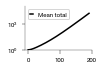

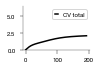

In [17]:
fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_yscale('log')
ax.set_ylim([1, 10**5])
plt.plot(time_values_in_vivo, res_in_vivo[0][0], label='Mean total', color='black')
plt.legend()

fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_ylim([0, 6.5])
plt.plot(time_values_in_vivo, np.sqrt(res_in_vivo[1][0])/(res_in_vivo[0][0]), label='CV total', color='black')
plt.legend()

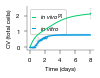

In [19]:
# data prep
y_arr_err = np.zeros((len(data.data_covariance_order), data.data_num_time_values, 2))
for var_inf in data.data_covariance_order:
    variable = var_inf['variables']
    i = var_inf['summary_indices']

    y_arr_err[i, :, 0] = data_in_vitro_cv_bootstrap[0, i, :] # var statistic
    y_arr_err[i, :, 1] = data_in_vitro_cv_bootstrap[1, i, :] # standard error
    
plt.rcParams.update({'figure.figsize': (1.2, 0.8)}) # 1.4, 1.8, 
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# in vitro data
plt.errorbar(data.data_time_values/24.0, y_arr_err[0, :, 0], yerr=y_arr_err[0, :, 1],
                        ecolor='lightgrey', markeredgecolor=cnaive, color=cnaive, fmt='o', # label='CD44+', 
                        capsize=0.3, capthick=0.5, elinewidth=0.4, linewidth=0.0, markersize=0.5)

# in vivo data
plt.errorbar([8], data_in_vivo_cv_bootstrap[0], yerr=data_in_vivo_cv_bootstrap[1],
                        ecolor='lightgrey', markeredgecolor=cactiv, color=cactiv, fmt='o', # label='CD44+', 
                        capsize=1, elinewidth=0.5, markeredgewidth=0.5, markersize=1)

# plot in vivo flossdorf model
plt.plot(time_values_in_vivo / 24.0, np.sqrt(res_in_vivo[1][0])/(res_in_vivo[0][0]), linewidth=1, color=cactiv, zorder=100, label='$in\,\,vivo^{\mathrm{[2]}}$')

# plot in vitro inferred model
plt.fill_between(x / 24.0, y_95_lower, y_median, color=cnaive, alpha=0.6, linewidth=0.0, zorder=100)
plt.plot(x / 24.0, y_median, color=cnaive, lw=1, zorder=200, label='$in\,\,vitro$')
plt.fill_between(x / 24.0, y_median, y_95_upper, color=cnaive, alpha=0.6, linewidth=0.0, zorder=100)

plt.xticks([0, 2, 4, 6, 8])

plt.legend()
# plt.ylim((None, 1.0))
plt.xlabel('Time (days)')
plt.ylabel('CV (total cells)')
plt.savefig('paper_figures/vivo_cv_data_vivo_vitro_errorbars_allmodels.pdf', bbox_inches='tight') # par2_d_6_8_l_18, allmodels

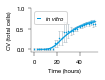

In [20]:
# data prep
y_arr_err = np.zeros((len(data.data_covariance_order), data.data_num_time_values, 2))
for var_inf in data.data_covariance_order:
    variable = var_inf['variables']
    i = var_inf['summary_indices']

    y_arr_err[i, :, 0] = data_in_vitro_cv_bootstrap[0, i, :] # var statistic
    y_arr_err[i, :, 1] = data_in_vitro_cv_bootstrap[1, i, :] # standard error
    
plt.rcParams.update({'figure.figsize': (1.2, 0.8)}) # 1.4, 1.8, 
plt.figure()
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# in vitro data
plt.errorbar(data.data_time_values, y_arr_err[0, :, 0], yerr=y_arr_err[0, :, 1],
                        ecolor=grey, markeredgecolor=cnaive, color=cnaive, fmt='o', # label='CD44+', 
                        capsize=1, elinewidth=0.5, markeredgewidth=0.5, markersize=1)

# plot in vitro inferred model
# 281 index stops at ~54 hours
plt.fill_between(x[:281], y_95_lower[:281], y_median[:281], color=cnaive, alpha=0.6, linewidth=0.0, zorder=100)
plt.plot(x[:281], y_median[:281], color=cnaive, lw=1, zorder=200, label='$in\,\,vitro$')
plt.fill_between(x[:281], y_median[:281], y_95_upper[:281], color=cnaive, alpha=0.6, linewidth=0.0, zorder=100)

plt.legend()
plt.ylim((None, 1.0))
plt.xlabel('Time (hours)')
plt.ylabel('CV (total cells)')
plt.savefig('paper_figures/vivo_cv_data_vitro_errorbars_allmodels.pdf', bbox_inches='tight') # par2_d_6_8_l_18, allmodels

In [4]:
y_95_lower[990:]

array([0.73313307, 0.73313306, 0.73313305, 0.73313305, 0.73313304,
       0.73313303, 0.73313301, 0.73313299, 0.73313298, 0.73313297])

In [6]:
y_median[990:]

array([0.78316559, 0.78316579, 0.78316599, 0.78316619, 0.78316638,
       0.78316657, 0.78316675, 0.78316694, 0.78316712, 0.7831673 ])

In [7]:
y_95_upper[990:]

array([0.85143165, 0.85143193, 0.85143221, 0.85143249, 0.85143276,
       0.85143303, 0.85143329, 0.85143355, 0.85143381, 0.85143407])

##### cv over time until day 8 post-infection, in vitro model vs. in vivo data

In [6]:
print(np.mean(data_in_vivo))
print(np.median(data_in_vivo))
print(stats.variation(data_in_vivo))
print(np.sqrt(np.var(data_in_vivo))/np.mean(data_in_vivo))
print(stats.variation(data_in_vivo))
print(np.sqrt(np.var(data_in_vivo, ddof=1))/np.mean(data_in_vivo))

15495.69237631579
3535.594
2.151349094560607
2.151349094560607
2.151349094560607
2.1656439301869628


In [7]:
def bootstrapping_cv(sample, num_resamples):
    """docstring for ."""
    ### sample should be a one-dimensional, flat array

    ### calculate the statistic of the sample
    stat_sample = stats.variation(sample)

    ### bootstrap the standard error of the sample statistic (se_stat_sample)
    # draw random number from sample with replacement
    resamples = np.random.choice(sample, size=(num_resamples, *sample.shape), replace=True)

    # calculate the statistic for each resample
    stat_resamples = stats.variation(resamples, axis=1)

    # compute the standard error as standard deviation over all statistic resamples
    se_stat_sample = np.std(stat_resamples, ddof=1)

    return (stat_sample, se_stat_sample)

In [8]:
# in vivo total cells with bootstrapping
bootstrap_samples = 100000
data_in_vivo_cv_bootstrap = bootstrapping_cv(np.array(data_in_vivo), bootstrap_samples)
print(data_in_vivo_cv_bootstrap)

(2.151349094560607, 0.3019006205434478)


In [31]:
with open(r'waiting_times_files/count_data_cd44_manual_counting_18_01_14_filtered_sigma022.pickle', 'rb') as input_file:
    data = pickle.load(input_file)

In [32]:
# total cells with bootstrapping
data_in_vitro_cv_bootstrap = np.full(data.data_covariance.shape, np.nan)
bootstrap_samples = 100000

for time_value_ind in range(data.data_num_time_values):
    data_in_vitro_cv_bootstrap[:, 0, time_value_ind] = bootstrapping_cv(np.sum(data.data_counts[:, :, time_value_ind], axis=1), 
                                                                 bootstrap_samples)

In [34]:
data_in_vitro_cv_bootstrap

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14572086,
         0.14572086, 0.28510602, 0.28510602, 0.41855991, 0.41855991,
         0.43723031, 0.45527215, 0.44472214, 0.48917271, 0.50709255,
         0.5534538 , 0.56532564, 0.59674251, 0.61200119, 0.6223098 ,
         0.64589025, 0.60736224, 0.62739069]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.08788918,
         0.08821672, 0.16819104, 0.16875574, 0.24206622, 0.2420305 ,
         0.16917688, 0.09379981, 0.07019577, 0.05163583, 0.05069911,
         0.045031  , 0.03662341, 0.04548679, 0.04925926, 0.05487365,
         0.05980315, 0.05826788, 0.0621703 ]]])

In [36]:
# NEW: introduce a basic sigma (same as mean and var data = 0.022)
# (not sure if this applies here too, buts just for plotting not fitting)
data_in_vitro_cv_bootstrap[1,:,:][data_in_vitro_cv_bootstrap[1,:,:]==0.0] = 0.022
data_in_vitro_cv_bootstrap

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.14572086,
         0.14572086, 0.28510602, 0.28510602, 0.41855991, 0.41855991,
         0.43723031, 0.45527215, 0.44472214, 0.48917271, 0.50709255,
         0.5534538 , 0.56532564, 0.59674251, 0.61200119, 0.6223098 ,
         0.64589025, 0.60736224, 0.62739069]],

       [[0.022     , 0.022     , 0.022     , 0.022     , 0.022     ,
         0.022     , 0.022     , 0.022     , 0.022     , 0.08788918,
         0.08821672, 0.16819104, 0.16875574, 0.24206622, 0.2420305 ,
         0.16917688, 0.09379981, 0.07019577, 0.05163583, 0.05069911,
         0.045031  , 0.03662341, 0.04548679, 0.04925926, 0.05487365,
         0.05980315, 0.05826788, 0.0621703 ]]])

In [41]:
# simulate best model to get cv prediction
# load the model selection results
with open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb') as input_file:
    est_res = pickle.load(input_file)

# net to simulate
est_net = 'par2_d_6_8_l_18'

# get estimation results for network of interest
est_names = [est.net.net_name for est in est_res]
# print(est_names)

est_net_res = est_res[est_names.index(est_net)]
print(est_net_res.net.net_name)

# define variables needed for simulation
initial_values = dict([(k, v) for k, v in est_net_res.net_initial_values.items()])
theta_values = dict(zip([est_net_res.net.net_rates_identifier[theta] for theta in est_net_res.net.net_theta_symbolic], est_net_res.bay_est_params_median))

time_values = est_net_res.data_time_values
variables = est_net_res.net_simulation.sim_variables
data_variables = [est_net_res.net_simulation.sim_variables_identifier[v_key][0] for v_key, in est_net_res.net_simulation.sim_variables_order[0]]# ['X_t', 'Y_t']
print(initial_values)
print(theta_values)
print(time_values)
print(variables)
print(data_variables)


# ### CHANGE VARIABLES to TOTAL CELLS and TIME VALUES
# variables = {'M_t': ('N_t', 'P1_t', 'P2_t', 'I_t', 'A_t')}
# time_values = np.linspace(0.0, 8*24.0, num=1000, endpoint=True)
# ###
# print(variables)

par2_d_6_8_l_18
{'M_t': 1.0, 'A_t': 0.0}
{'d1': 0.042923251247255406, 'd2': 0.011055198630551691, 'l1': 0.0749600519501222}
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54.]
{'M_t': ('M_t',), 'A_t': ('A_t',)}
['A_t', 'M_t']


In [71]:
### computation

# CHANGE VARIABLES to TOTAL CELLS and TIME VALUES
variables = {'T_t': ('M_t', 'A_t')}
time_values = np.linspace(0.0, 8*24.0, num=1000, endpoint=True)

sim = me.Simulation(est_net_res.net)
res = sim.simulate('moments', variables, initial_values, theta_values, time_values)

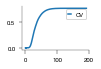

In [45]:
# print(res)

fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# plt.plot(time_values, res[0][0], label='Mean')
# plt.plot(time_values, res[1][0], label='Variance')
# plt.plot(time_values, np.sqrt(res[1][0]), label='Std.')
plt.plot(time_values, np.sqrt(res[1][0])/res[0][0], label='CV')
plt.legend()

In [44]:
# in vivo model from Flossdorf PhD Thesis
### input
topology_in_vivo = [
        {'start': 'naive', 'end': 'TCMp', 'rate_symbol': 'd_0', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TCMp', 'end': 'TEMp', 'rate_symbol': 'd_1', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TEMp', 'end': 'TEF', 'rate_symbol': 'd_2', 'type': 'S -> E', 'reaction_steps': 1},
        {'start': 'TCMp', 'end': 'TCMp', 'rate_symbol': 'la_1', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'TEMp', 'end': 'TEMp', 'rate_symbol': 'la_2', 'type': 'S -> S + S', 'reaction_steps': 1},
        {'start': 'TEF', 'end': 'TEF', 'rate_symbol': 'la_3', 'type': 'S -> S + S', 'reaction_steps': 1},
        ]

initial_values_in_vivo = {'naive': 1.0, 'TCMp': 0.0, 'TEMp': 0.0, 'TEF': 0.0}
theta_values_in_vivo = {'la_1': 0.83/24, 'la_2': 1.44/24, 'la_3': 1.59/24, 'd_0': 2.4/24, 'd_1': 0.155/24, 'd_2': 0.052/24}
time_values_in_vivo = np.linspace(0.0, 24 * 8.0, num=1000, endpoint=True)
variables_in_vivo_individ = {'naive': ('naive', ), 'TCMp': ('TCMp', ), 'TEMp': ('TEMp', ), 'TEF': ('TEF', )}
variables_in_vivo_total = {'total': ('naive', 'TCMp', 'TEMp', 'TEF')}

### computation
net_in_vivo = me.Network('net_in_vivo_flossdorf')
net_in_vivo.structure(topology_in_vivo)

sim_in_vivo = me.Simulation(net_in_vivo)
res_in_vivo = sim_in_vivo.simulate('moments', variables_in_vivo_total, # variables_in_vivo_total, variables_in_vivo_individ
                                   initial_values_in_vivo, 
                                   theta_values_in_vivo, 
                                   time_values_in_vivo) 


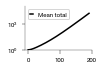

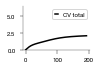

In [46]:
fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_yscale('log')
ax.set_ylim([1, 10**5])
plt.plot(time_values_in_vivo, res_in_vivo[0][0], label='Mean total', color='black')
plt.legend()

fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_ylim([0, 6.5])
plt.plot(time_values_in_vivo, np.sqrt(res_in_vivo[1][0])/(res_in_vivo[0][0]), label='CV total', color='black')
plt.legend()

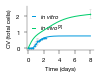

In [79]:
y_arr_err = np.zeros((len(data.data_covariance_order), data.data_num_time_values, 2))

for var_inf in data.data_covariance_order:
    variable = var_inf['variables']
    i = var_inf['summary_indices']

    y_arr_err[i, :, 0] = data_in_vitro_cv_bootstrap[0, i, :] # var statistic
    y_arr_err[i, :, 1] = data_in_vitro_cv_bootstrap[1, i, :] # standard error

fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_ylim([-0.1, 2.6])
ax.set_xlim([-0.2, 8.4])

# in vitro data
plt.errorbar(data.data_time_values/24.0, y_arr_err[0, :, 0], yerr=y_arr_err[0, :, 1],
                        ecolor='lightgrey', markeredgecolor=cnaive, color=cnaive, fmt='o', # label='CD44+', 
                        capsize=0.3, capthick=0.5, elinewidth=0.4, linewidth=0.0, markersize=0.5)

# in vivo data
plt.errorbar([8], data_in_vivo_cv_bootstrap[0], yerr=data_in_vivo_cv_bootstrap[1],
                        ecolor='lightgrey', markeredgecolor=cactiv, color=cactiv, fmt='o', # label='CD44+', 
                        capsize=1, elinewidth=0.5, markeredgewidth=0.5, markersize=1)

# print(np.sqrt(res[1][0])/res[0][0])
# print(res[1][0])
# print(np.sqrt(res[1][0]))
# print(res[0][0])
# plt.axhline(y=(np.sqrt(res[1][0])/res[0][0])[-1], color='tomato', linestyle='-', zorder=-1, alpha=0.4,
#             label='$\mathrm{CV}_{in\,\,vitro\,\,\mathrm{model}}$' + f' = {round((np.sqrt(res[1][0])/res[0][0])[-1], 2)}')

# plt.axhline(y=data_in_vivo_cv_bootstrap[0], color='gold', linestyle='-', zorder=-1, alpha=0.4,
#             label='$\mathrm{CV}_{in\,\,vivo}$' + f' = {round(data_in_vivo_cv_bootstrap[0], 1)}')

# plot in vitro inferred model
plt.plot(time_values / 24.0, np.sqrt(res[1][0])/res[0][0], linewidth=1, color=cnaive, zorder=100, label='$in\,\,vitro$')

# plot in vivo flossdorf model
plt.plot(time_values / 24.0, np.sqrt(res_in_vivo[1][0])/(res_in_vivo[0][0]), linewidth=1, color=cactiv, zorder=100, label='$in\,\,vivo^{\mathrm{[2]}}$')

plt.legend(prop={'size': 200})
plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')

plt.xticks([0, 2, 4, 6, 8])

plt.xlabel('Time (days)')
plt.ylabel('CV (total cells)')
plt.savefig(f'paper_figures/vivo_cv_data_vivo_vitro_errorbars.pdf', bbox_inches='tight')

In [80]:
### CHANGE VARIABLES to TOTAL CELLS and TIME VALUES
variables = {'T_t': ('M_t', 'A_t')}
time_values = np.linspace(0.0, 54.0, num=1000, endpoint=True)
###

### computation
sim = me.Simulation(est_net_res.net)
res = sim.simulate('moments', variables, initial_values, theta_values, time_values)

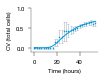

In [81]:
y_arr_err = np.zeros((len(data.data_covariance_order), data.data_num_time_values, 2))

for var_inf in data.data_covariance_order:
    variable = var_inf['variables']
    i = var_inf['summary_indices']

    y_arr_err[i, :, 0] = data_in_vitro_cv_bootstrap[0, i, :] # var statistic
    y_arr_err[i, :, 1] = data_in_vitro_cv_bootstrap[1, i, :] # standard error

fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.set_ylim([-0.1, 0.9])
# ax.set_xlim([-0.2, 2.5])

# in vitro data
plt.errorbar(data.data_time_values, y_arr_err[0, :, 0], yerr=y_arr_err[0, :, 1],
                        ecolor=grey, markeredgecolor=cnaive, color=cnaive, fmt='o', # label='CD44+', 
                        capsize=1, elinewidth=0.5, markeredgewidth=0.5, markersize=1)

# print(np.sqrt(res[1][0])/res[0][0])
# print(res[1][0])
# print(np.sqrt(res[1][0]))
# print(res[0][0])
# plt.axhline(y=(np.sqrt(res[1][0])/res[0][0])[-1], color='darkorange', linestyle='-', zorder=-1, alpha=0.4,
#            label='$\mathrm{CV}_{in\,\,vitro\,\,\mathrm{model}}$' + f' = {round((np.sqrt(res[1][0])/res[0][0])[-1], 1)}')


# plot in vitro inferred model
plt.plot(time_values, np.sqrt(res[1][0])/res[0][0], linewidth=1, color=cnaive, zorder=100)


# plt.legend(prop={'size': 200})
# plt.legend(frameon=False)
# leg.get_frame().set_edgecolor('lightgrey')
plt.ylim((None, 1.0))
plt.xlabel('Time (hours)')
plt.ylabel('CV (total cells)')
plt.savefig('paper_figures/vivo_cv_data_model_vitro_errorbars.pdf', bbox_inches='tight')

##### [over all models] cell numbers at day 8 post-infection, in vitro model vs. in vivo data

In [2]:
# NEW: try to do the cv prediction as inference over all models
res1 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_minimal2.pickle', 'rb'))
res2 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb'))
res3 = pickle.load(open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par3.pickle', 'rb'))
res = res1 + res2 + res3
print(len(res1), len(res2), len(res3), len(res))

net_names = [est.net.net_name for est in res]
model_probs = me.selection.compute_model_probabilities(res)
data = res[0].data
print(sum(['alphaF' in name for name in net_names]))

100 288 588 976
0


In [3]:
# set model prior to give classes same weight
mprior = np.array([0.25] + [0.25/99]*99 + [0.25/288]*288 + [0.25/588]*588)
print(sum(mprior))
print(len(mprior))

1.000000000000017
976


In [6]:
# ADAPTED FROM hist_cell_counts_samples in settings_load.py script
def simulate_inference(res, time_values, samples, mprior):
    model_probs = me.selection.compute_model_probabilities(res, mprior=mprior)

    # over results list
    sim_res_list = list()

    # for checking set a counter
    model_type_counts = np.zeros((4,))

    for i in range(samples):
        if i%20==0: print(i)
        # get random model according to p(M|D)
        model_rand = np.random.choice(range(len(model_probs)), p=model_probs, replace=True)
        est = res[model_rand]

        # decide whether phase type or markov/erlang model
        # par 3 model
        if 'par3_' in est.net.net_name:
            model_type_counts[3] += 1
            # get random theta for model
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]
            d1, d2, d3, l = theta
            theta_values = {'d1': d1, 'd2': d2,
                                'd3': d3, 'l1': l}

            # sim settings for par3 model
            initial_values = {'M_t': 1, 'A_t': 0}
            variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

            sim = me.Simulation(est.net)
            sim_res = sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1]

        # par 2 model
        elif 'par2_' in est.net.net_name:
            model_type_counts[2] += 1

            # get random theta for model
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]
            d1, d2, l1 = theta
            theta_values = {'d1': d1, 'd2': d2, 'l1': l1}

            # sim settings for par2 model
            initial_values = {'M_t': 1, 'A_t': 0}
            variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

            sim = me.Simulation(est.net)
            sim_res = sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1]

        # par1+i model (identified by d_ni symbolic rate)
        elif 'd_ni' in est.net.net_rates_identifier.values():
            model_type_counts[1] += 1

            # get random theta for model
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]
            dna, dni, l = theta
            theta_values = {'d_na': dna, 'd_ni': dni, 'la_a': l}

            # sim settings for par3 model
            initial_values = {'N_t': 1, 'I_t': 0, 'A_t': 0}
            variables = {'M_t': ('N_t', 'I_t'), 'A_t': ('A_t', )}

            # different memopy versions
            # (sim = me.Simulation(est.net)) usually works
            dna_steps = est.net.net_modules[0]['module_steps']
            dni_steps = est.net.net_modules[1]['module_steps']
            l_steps = est.net.net_modules[2]['module_steps']

            t = [
            {'start': 'N_t', 'end': 'A_t', 'rate_symbol': 'd_na', 'type': 'S -> E', 'reaction_steps': dna_steps},
            {'start': 'N_t', 'end': 'I_t', 'rate_symbol': 'd_ni', 'type': 'S -> E', 'reaction_steps': dni_steps},
            {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': l_steps}
            ]

            net = me.Network(est.net.net_name)
            net.structure(t)

            sim = me.Simulation(net)
            sim_res = sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1]

        # markov/erlang model
        else:
            model_type_counts[0] += 1
            # get random theta for model
            inds = np.array(range(0, est.bay_est_samples_weighted.shape[0]))
            theta_ind = np.random.choice(inds, replace=True)
            theta = est.bay_est_samples_weighted[theta_ind, :]
            a1, l = theta
            theta_values = {'d_ma': a1, 'la_a': l}

            # sim settings for par3 model
            initial_values = {'M_t': 1, 'A_t': 0}
            variables = {'M_t': ('M_t', ), 'A_t': ('A_t', )}

            # different memopy versions
            # (sim = me.Simulation(est.net)) usually works
            d_steps = est.net.net_modules[0]['module_steps']
            l_steps = est.net.net_modules[1]['module_steps']

            t = [
            {'start': 'M_t', 'end': 'A_t', 'rate_symbol': 'd_ma', 'type': 'S -> E', 'reaction_steps': d_steps},
            {'start': 'A_t', 'end': 'A_t', 'rate_symbol': 'la_a', 'type': 'S -> S + S', 'reaction_steps': l_steps}
            ]

            net = me.Network(est.net.net_name)
            net.structure(t)

            sim = me.Simulation(net)
            sim_res = sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1]
        
        # save to overall results list
        print(sim_res)
        sim_res_list.append(sim_res)
        
        # save stuff immediately
        with open(f'in_vivo_files/infer_all_models/res_iter{i}.pickle', 'wb') as handle:
            pickle.dump(sim_res, handle)
        with open('in_vivo_files/infer_all_models/res_list.pickle', 'wb') as handle:
            pickle.dump(sim_res_list, handle)
            
    print(model_type_counts)
    return sim_res_list

In [18]:
# run for 8 days (dense time for plotting)
# including 54 hours (to look at "silent" wells)
time_values = np.array([0.0, 54.0, 4*24.0, 8*24.0])

# run simulations
num_iter = 100 # 76 # 100 # 1000, 10000

sim_net_counts = np.array(simulate_inference(res, time_values, num_iter, mprior))

0
[[0. 0. 0. 0.]
 [1. 1. 1. 1.]]
[[0.000e+00 4.000e+00 3.400e+01 5.437e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.00e+00 5.00e+00 4.60e+01 8.04e+03]
 [1.00e+00 0.00e+00 0.00e+00 0.00e+00]]
[[0.000e+00 3.000e+00 3.700e+01 5.815e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 4.000e+00 4.000e+01 7.082e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 8.000e+00 8.600e+01 9.887e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 2.000e+00 1.700e+01 2.776e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 2.000e+00 1.700e+01 3.078e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 3.000e+00 2.600e+01 3.536e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 7.000e+00 7.100e+01 1.172e+04]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[ 0.  0.  0. 75.]
 [ 1.  1.  1.  0.]]
[[0.000e+00 2.000e+00 1.600e+01 2.579e+03]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 2.000e+00 1.800e+01 3.327e+03]
 [1.000e+00 0.000e+00 0

In [92]:
with open('in_vivo_files/infer_all_models/res_list.pickle', 'rb') as handle:
    res_list_load = pickle.load(handle)
sim_net_counts = np.array(res_list_load)

In [93]:
sim_net_counts.shape

(100, 2, 4)

In [94]:
data_in_vitro_all = sim_net_counts[:, 0, -1]
print(data_in_vitro_all)

### previous version
# data_in_vitro = [data for data in data_in_vitro_all if data > 0.0]
###

### NEW general
data_nonsilent_hue = sim_net_counts[:, 0, 1] != 0

# 1) new, here (sum for total cells)
data_in_vitro = np.sum(sim_net_counts[:, :, -1], axis=1)
print(data_in_vitro)

# 2) alternative (remove "silent" wells = no act after 54 hours)
# data_in_vitro = sim_net_counts[data_nonsilent_hue, 0, -1]
# data_nonsilent_hue = data_nonsilent_hue[data_nonsilent_hue]
###

print(len(data_in_vitro))
len(data_in_vitro)/len(data_in_vitro_all)

[0.0000e+00 5.4370e+03 8.0400e+03 5.8150e+03 7.0820e+03 9.8870e+03
 2.7760e+03 3.0780e+03 3.5360e+03 1.1720e+04 7.5000e+01 2.5790e+03
 3.3270e+03 9.5000e+01 5.8500e+02 5.6530e+03 7.2310e+03 3.1670e+03
 6.5160e+03 3.5920e+03 2.1200e+02 8.0000e+01 8.9200e+02 8.4540e+03
 6.1870e+03 5.8600e+03 5.0170e+03 4.3600e+03 8.6070e+03 0.0000e+00
 6.5620e+03 7.5590e+03 8.9050e+03 4.7300e+03 5.3980e+03 6.6880e+03
 9.0000e+00 5.4770e+03 8.0200e+03 4.5830e+03 2.2700e+02 3.2750e+03
 3.5910e+03 9.5060e+03 4.6110e+03 2.2520e+03 1.0000e+01 2.4240e+03
 1.3642e+04 4.1980e+03 4.9010e+03 7.8930e+03 7.3100e+03 3.5210e+03
 7.9440e+03 6.9860e+03 2.5460e+03 5.0660e+03 4.2750e+03 5.6760e+03
 8.2790e+03 6.1380e+03 5.7790e+03 3.4470e+03 4.8240e+03 4.9740e+03
 0.0000e+00 6.2310e+03 1.2540e+03 7.2730e+03 5.7100e+03 1.0672e+04
 6.8900e+02 7.2810e+03 0.0000e+00 0.0000e+00 1.1707e+04 8.5350e+03
 7.3310e+03 7.8560e+03 6.3280e+03 1.5063e+04 1.2076e+04 1.4795e+04
 4.9480e+03 4.1570e+03 2.6320e+03 0.0000e+00 8.7520e+03 1.0046

1.0

In [95]:
print(np.amin(data_in_vitro))
print(np.amax(data_in_vitro))

print(np.amin(data_in_vivo))
print(np.amax(data_in_vivo))

1.0
15063.0
184.0959
226508.2


In [96]:
print(len(data_in_vitro))
print(len(data_in_vivo))
print('mean')
print(np.mean(data_in_vitro))
print(np.mean(data_in_vivo))

print('median')
print(np.median(data_in_vitro))
print(np.median(data_in_vivo))

print('cv')
print(stats.variation(data_in_vitro))
print(stats.variation(data_in_vivo))

print('skew')
print(stats.skew(data_in_vitro))
print(stats.skew(data_in_vivo))

print('kurtosis')
print(stats.kurtosis(data_in_vitro))
print(stats.kurtosis(data_in_vivo))

100
76
mean
5150.88
15495.69237631579
median
5041.5
3535.594
cv
0.6771408914448882
2.151349094560607
skew
0.4249312716908381
4.160572646856741
kurtosis
0.06167331519020891
20.42745522079365


In [97]:
# convert to pandas dataframe

data_in_vivo_pd = pd.DataFrame([(data, 'in vivo', 'in vivo') for data in data_in_vivo], 
                               columns=['cell_counts', 'type', 'hue'])
data_in_vitro_pd = pd.DataFrame([(data, 'in vitro', 'silent' if not s else 'nonsilent') 
                                 for (data, s) in zip(data_in_vitro, data_nonsilent_hue)], 
                                columns=['cell_counts', 'type', 'hue'])

data_pd = pd.concat([data_in_vivo_pd, data_in_vitro_pd], sort=False)
display(data_pd)

,cell_counts,type,hue
0,573.0512,in vivo,in vivo
1,303.4965,in vivo,in vivo
2,1270.8920,in vivo,in vivo
3,226508.2000,in vivo,in vivo
4,1991.6960,in vivo,in vivo
...,...,...,...
95,2332.0000,in vitro,nonsilent
96,1.0000,in vitro,silent
97,2.0000,in vitro,silent
98,4402.0000,in vitro,nonsilent


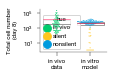

In [99]:
# plot with seaborn beeswarm plot
fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_yscale('log')
# ax.set_ylim([80, 8* 10**5])

ax = sns.boxplot(x=data_pd['type'], y=data_pd['cell_counts'], data=data_pd,
        showcaps=False, boxprops={'facecolor':'None'},
        showfliers=False, whiskerprops={'linewidth': 0},
        showmeans=True, meanline=True, meanprops={'linestyle': '-', 'linewidth': 0.5, 'color': cwact},
        linewidth=0.5, zorder=500)

c_list = [cactiv, cnaive, cactiv, cnaive]
ax = sns.swarmplot(x=data_pd['type'], y=data_pd['cell_counts'], 
                   data=data_pd, hue='hue', 
                   palette={'in vivo': cactiv, 'nonsilent': cnaive, 'silent':cwdiv}, 
                   size=1.0, zorder=10)

plt.locator_params(axis='y', numticks=5)

# relabel xticks
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'in vivo\ndata'# '$in\,\,vivo\,\,\mathrm{data}$' # ^{\mathrm{[2]}}
labels[1] = 'in vitro\ninference' # '$in\,\,vitro\,\,\mathrm{model}$'
ax.set_xticklabels(labels)

plt.xlabel(None)
plt.ylabel('Total cell number\n(day 8)')
plt.savefig(f'paper_figures/vivo_data_in_vivo_vs_vitro_model_infer_allmodels_allsilent.pdf', bbox_inches='tight')

##### cell numbers at day 8 post-infection, in vitro model vs. in vivo data

In [2]:
# simulate best model to get cv prediction
# load the model selection results
with open('waiting_times_files/estimation_count_data_cd44_filtered_sigma022_par2.pickle', 'rb') as input_file:
    est_res = pickle.load(input_file)

# net to simulate
est_net = 'par2_d_6_8_l_18'
    
# get estimation results for network of interest
est_names = [est.net.net_name for est in est_res]
# print(est_names)

est_net_res = est_res[est_names.index(est_net)]
print(est_net_res.net.net_name)

# define variables needed for simulation
initial_values = dict([(k, int(v)) for k, v in est_net_res.net_initial_values.items()])
theta_values = dict(zip([est_net_res.net.net_rates_identifier[theta] for theta in est_net_res.net.net_theta_symbolic], est_net_res.bay_est_params_median))

# ### NOTE THETA CHANGED FOR TESTING (DOUBLE SPEED)
# theta_values = dict(zip([est_net_res.net.net_rates_identifier[theta] for theta in est_net_res.net.net_theta_symbolic], 1.6 * est_net_res.bay_est_params_median))
# ###

time_values = est_net_res.data_time_values
variables = est_net_res.net_simulation.sim_variables
data_variables = [est_net_res.net_simulation.sim_variables_identifier[v_key][0] for v_key, in est_net_res.net_simulation.sim_variables_order[0]]# ['X_t', 'Y_t']
print(initial_values)
print(theta_values)
print(time_values)
print(variables)
print(data_variables)

# print([(k, int(v)) for k, v in est_net_res.net_initial_values.items()])

# print(est_net_res.net.net_rates_identifier)
# print(est_net_res.net.net_theta_symbolic)
# print(est_net_res.net_initial_values)
# print(est_net_res.bay_est_params_median)
# print(est_net_res.net_simulation)
# print(est_net_res.data_time_values)
# print(est_net_res.net_simulation.sim_variables)
# print(est_net_res.net_simulation.sim_variables_order)
# print(est_net_res.net_simulation.sim_variables_identifier)

par2_d_6_8_l_18
{'M_t': 1, 'A_t': 0}
{'d1': 0.042923251247255406, 'd2': 0.011055198630551691, 'l1': 0.0749600519501222}
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20. 22. 24. 26. 28. 30. 32. 34.
 36. 38. 40. 42. 44. 46. 48. 50. 52. 54.]
{'M_t': ('M_t',), 'A_t': ('A_t',)}
['A_t', 'M_t']


In [10]:
# run for 8 days (dense time for plotting)
time_values = np.linspace(0, 24*8.0, num=3, endpoint=True)

# run simulations
num_iter = 76 # 100 # 1000, 10000

sim = me.Simulation(est_net_res.net)
res_list = list()

for i in range(num_iter):
    
    if i % 20 == 0: print(i)
    res = sim.simulate('gillespie', variables, initial_values, theta_values, time_values)[1]
    print(res)
    res_list.append(res)
    
    # save stuff immediately
    with open(f'in_vivo_files/best_fit_par2_d_6_8_l_18/res_iter{i}.pickle', 'wb') as handle:
        pickle.dump(res, handle)
    with open('in_vivo_files/best_fit_par2_d_6_8_l_18/res_list.pickle', 'wb') as handle:
        pickle.dump(res_list, handle)

sim_net_counts = np.array(res_list)

0
[[  0.   1. 140.]
 [  1.   0.   0.]]
[[0.000e+00 8.000e+00 1.029e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 1.800e+01 3.132e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[ 0.  0. 11.]
 [ 1.  1.  0.]]
[[0.000e+00 2.100e+01 3.552e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[0.00e+00 5.30e+01 7.93e+03]
 [1.00e+00 0.00e+00 0.00e+00]]
[[0.000e+00 3.500e+01 5.479e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[  0.   4. 703.]
 [  1.   0.   0.]]
[[0.000e+00 3.100e+01 4.883e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 2.400e+01 4.193e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[ 0.  0. 88.]
 [ 1.  1.  0.]]
[[0.000e+00 3.800e+01 6.702e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[  0.   6. 793.]
 [  1.   0.   0.]]
[[  0.   1. 171.]
 [  1.   0.   0.]]
[[0.000e+00 8.000e+00 1.349e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 4.100e+01 7.224e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[0.000e+00 1.500e+01 2.442e+03]
 [1.000e+00 0.000e+00 0.000e+00]]
[[  0.   5. 911.]
 [  1.   0.   0.]]
[[  0.   4. 403.]
 [

In [11]:
with open('in_vivo_files/best_fit_par2_d_6_8_l_18/res_list.pickle', 'rb') as handle:
    res_list_load = pickle.load(handle)
sim_net_counts = np.array(res_list_load)
# print(np.all(sim_net_counts == np.array(res_list_load)))

# with open(f'in_vitro_day8_simulations/res_iter{num_iter - 1}.pickle', 'rb') as handle:
#     res_last_load = pk.load(handle)

# print(np.all(res == res_last_load))

In [15]:
sim_net_counts.shape

(76, 2, 3)

In [6]:
# print(sim_net_counts.shape)
# print(sim_net_counts[:, :, :])
# print(np.mean(np.sum(sim_net_counts, axis=1), axis=0))

# simulated from 5 single cells (excluded non-actived wells/single naive cells)
# 4 days: 35 cells
# 5 days: 160 cells
# 6 days: 300 cells
# 6.5 days: 1000 cells
# 7 days: 2000
# 7.5 days: 3000
# 8 days: 9000 (about 1 hour computation for 5 cells)

# rough estimate
# 7 days: 2000
# 7.5 days: 4000
# 8 days: 8000

# (5, 2, 3)
# [[[0.0000e+00 8.0000e+00 1.1640e+03]
#   [1.0000e+00 0.0000e+00 0.0000e+00]]

#  [[0.0000e+00 6.8000e+01 1.1997e+04]
#   [1.0000e+00 0.0000e+00 0.0000e+00]]

#  [[0.0000e+00 8.0000e+01 1.3609e+04]
#   [1.0000e+00 0.0000e+00 0.0000e+00]]

#  [[0.0000e+00 7.9000e+01 1.2603e+04]
#   [1.0000e+00 0.0000e+00 0.0000e+00]]

#  [[0.0000e+00 3.6000e+01 6.2950e+03]
#   [1.0000e+00 0.0000e+00 0.0000e+00]]]
# [1.0000e+00 5.4200e+01 9.1336e+03]

In [16]:
# collected simulation data for day 8
# [1164.0, 11997.0, 13609.0, 12603.0, 6295.0]
data_in_vitro_all = sim_net_counts[:, 0, -1]
print(data_in_vitro_all)

data_in_vitro = [data for data in data_in_vitro_all if data > 0.0]
print(data_in_vitro)

len(data_in_vitro)/len(data_in_vitro_all)

[1.4000e+02 1.0290e+03 3.1320e+03 1.1000e+01 3.5520e+03 7.9300e+03
 5.4790e+03 7.0300e+02 4.8830e+03 4.1930e+03 8.8000e+01 6.7020e+03
 7.9300e+02 1.7100e+02 1.3490e+03 7.2240e+03 2.4420e+03 9.1100e+02
 4.0300e+02 1.6032e+04 9.3300e+03 4.6010e+03 1.3150e+03 3.3240e+03
 7.3620e+03 2.6430e+03 4.4640e+03 1.3130e+03 9.1000e+01 7.2600e+03
 1.1932e+04 1.2409e+04 5.9460e+03 5.5400e+02 6.6000e+01 1.4000e+01
 3.3300e+02 8.8800e+03 1.6179e+04 7.0960e+03 2.4100e+02 2.7990e+03
 3.9000e+01 6.1750e+03 1.0951e+04 5.9480e+03 6.1200e+02 7.1230e+03
 7.0920e+03 1.0356e+04 1.1600e+02 6.2300e+03 6.2630e+03 7.8710e+03
 4.1810e+03 3.9910e+03 5.9490e+03 3.1410e+03 8.0000e+01 4.0130e+03
 3.0070e+03 7.5100e+03 1.0511e+04 3.3300e+02 1.3600e+02 9.9300e+02
 1.0470e+03 2.3650e+03 8.0730e+03 1.3534e+04 1.2530e+03 8.1650e+03
 3.4470e+03 1.7700e+02 5.9550e+03 7.8980e+03]
[140.0, 1029.0, 3132.0, 11.0, 3552.0, 7930.0, 5479.0, 703.0, 4883.0, 4193.0, 88.0, 6702.0, 793.0, 171.0, 1349.0, 7224.0, 2442.0, 911.0, 403.0, 16032.0

1.0

In [19]:
print(np.amin(data_in_vitro))
print(np.amax(data_in_vitro))

print(np.amin(data_in_vivo))
print(np.amax(data_in_vivo))

11.0
16179.0
184.0959
226508.2


In [47]:
print(len(data_in_vitro))
print(len(data_in_vivo))
print('mean')
print(np.mean(data_in_vitro))
print(np.mean(data_in_vivo))

print('median')
print(np.median(data_in_vitro))
print(np.median(data_in_vivo))

print('cv')
print(stats.variation(data_in_vitro))
print(stats.variation(data_in_vivo))

print('skew')
print(stats.skew(data_in_vitro))
print(stats.skew(data_in_vivo))

print('kurtosis')
print(stats.kurtosis(data_in_vitro))
print(stats.kurtosis(data_in_vivo))

76
76
mean
4471.763157894737
15495.69237631579
median
3771.5
3535.594
cv
0.9020553925085404
2.151349094560607
skew
0.8551707367617116
4.160572646856741
kurtosis
0.20213023619272485
20.42745522079365


In [20]:
# convert to pandas dataframe

data_in_vivo_pd = pd.DataFrame([(data, 'in vivo') for data in data_in_vivo], columns=['cell_counts', 'type'])
data_in_vitro_pd = pd.DataFrame([(data, 'in vitro') for data in data_in_vitro], columns=['cell_counts', 'type'])

data_pd = pd.concat([data_in_vivo_pd, data_in_vitro_pd], sort=False)
# display(data_pd)

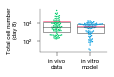

In [45]:
# plot with seaborn beeswarm plot
fig, ax = plt.subplots(figsize=(1.2, 0.8))
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

ax.set_yscale('log')
# ax.set_ylim([80, 8* 10**5])

ax = sns.boxplot(x=data_pd['type'], y=data_pd['cell_counts'], data=data_pd,
        showcaps=False, boxprops={'facecolor':'None'},
        showfliers=False, whiskerprops={'linewidth': 0},
        showmeans=True, meanline=True, meanprops={'linestyle': '-', 'linewidth': 0.5, 'color': cwact},
        linewidth=0.5, zorder=500)

ax = sns.swarmplot(x=data_pd['type'], y=data_pd['cell_counts'], data=data_pd, palette=[cactiv, cnaive], 
                   size=1.4, zorder=10)

# relabel xticks
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'in vivo\ndata'# '$in\,\,vivo\,\,\mathrm{data}$' # ^{\mathrm{[2]}}
labels[1] = 'in vitro\nmodel' # '$in\,\,vitro\,\,\mathrm{model}$'
ax.set_xticklabels(labels)

plt.xlabel(None)
plt.ylabel('Total cell number\n(day 8)')
plt.savefig(f'paper_figures/vivo_data_in_vivo_vs_vitro_model_best_fit_par2_d_6_8_l_18.pdf', bbox_inches='tight')